In [1]:
# -*- coding: utf-8 -*-   
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.plotly as py
import plotly.graph_objs as go
from sklearn import linear_model
import plotly.plotly as py
import plotly.graph_objs as go
import re
from scipy import stats

In [2]:
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\SimSun.ttc", size=14)

In [3]:
df = pd.read_excel(r'C:\Users\ren.x.1\Desktop\VS_Pricing\VSJDePOS.xlsx',encoding='gbk')
df.shape

(28723, 13)

In [4]:
df.dropna(inplace = True)

In [5]:
df = df[df.cost != 0]
df = df[df.Preferential_Price != 0]

In [6]:
df.head()

,Date,ProductCode,ProductName,Category,pv,uv,Order_Num,Valid_Num,Sales_Num,Preferential_Price,Add_To_Cart_Num,SuperID,cost
0,2016-01-01,1071722,【京东超市】沙宣男士护发素净化打底180ml,conditioner,56,35,9,9,9,228.1,17,Conditioner净化打底180,22.20
1,2016-01-01,1071724,【京东超市】沙宣男士洗发水洁净去屑700ml（洗发露 去屑止痒 控油）,shampoo,415,338,20,20,20,1646.0,52,Shampoo洁净去屑700,69.43
2,2016-01-01,1071842,【京东超市】沙宣男士洗发水清爽劲醒700ml（洗发露 控油洗发水 头发护理 深层清洁）,shampoo,743,543,43,43,44,3685.0,106,Shampoo清爽劲醒700,69.43
3,2016-01-01,1071850,【京东超市】沙宣男士洗发水净化打底700ml（洗发露）,shampoo,131,91,5,5,5,403.0,14,Shampoo净化打底700,69.43
4,2016-01-01,1224776,沙宣男士洗发水净化打底460ml送赠品套装（洗发露50ml+护发素50ml+免洗精华液30ml）,shampoo,195,156,9,9,9,593.1,29,Shampoo净化打底460,52.07


In [7]:
df.Date = pd.to_datetime(df.Date)

In [8]:
t = pd.DatetimeIndex(df.Date)
month = t.month
df['Month'] = month

In [9]:
df= df[(df.Month) != 6]
df= df[(df.Month) != 11]

In [10]:
df['Price'] = df['Preferential_Price']/df['Sales_Num']

In [11]:
df.head()

,Date,ProductCode,ProductName,Category,pv,uv,Order_Num,Valid_Num,Sales_Num,Preferential_Price,Add_To_Cart_Num,SuperID,cost,Month,Price
0,2016-01-01,1071722,【京东超市】沙宣男士护发素净化打底180ml,conditioner,56,35,9,9,9,228.1,17,Conditioner净化打底180,22.20,1,25.344444
1,2016-01-01,1071724,【京东超市】沙宣男士洗发水洁净去屑700ml（洗发露 去屑止痒 控油）,shampoo,415,338,20,20,20,1646.0,52,Shampoo洁净去屑700,69.43,1,82.300000
2,2016-01-01,1071842,【京东超市】沙宣男士洗发水清爽劲醒700ml（洗发露 控油洗发水 头发护理 深层清洁）,shampoo,743,543,43,43,44,3685.0,106,Shampoo清爽劲醒700,69.43,1,83.750000
3,2016-01-01,1071850,【京东超市】沙宣男士洗发水净化打底700ml（洗发露）,shampoo,131,91,5,5,5,403.0,14,Shampoo净化打底700,69.43,1,80.600000
4,2016-01-01,1224776,沙宣男士洗发水净化打底460ml送赠品套装（洗发露50ml+护发素50ml+免洗精华液30ml）,shampoo,195,156,9,9,9,593.1,29,Shampoo净化打底460,52.07,1,65.900000


In [12]:
def jointplt(SKU_NAME):
    SKU = df[df['SuperID'] == SKU_NAME][['Price','Sales_Num']]
    SKU = SKU.groupby(by = 'Price',as_index=False).mean()
    SKU = SKU[SKU.Sales_Num >= 10]
    SKU.Sales_Num = np.log(SKU.Sales_Num)
    SKU.Price = np.log(SKU.Price)
    sns.jointplot(x="Price", y="Sales_Num", kind = 'reg', color = 'r', data=SKU)
    plt.ylim(0,10)
    #plt.title(SKU_NAME,fontproperties=font)

In [13]:
def reg(SKU_NAME):
    SKU = df[df.SuperID == SKU_NAME]
    regr = linear_model.LinearRegression(fit_intercept=True)
    # Train the model using the training sets
    x = np.log(SKU.Price.reshape(len(SKU.Price),1))
    y = np.log(SKU.Sales_Num)
    regr.fit(x,y)
    # The coefficients
    return regr.coef_[0]

In [63]:
def statsReg(SKU_NAME):
    SKU = df[df.SuperID == SKU_NAME]
    x = np.log(SKU.Price)
    y = np.log(SKU.Sales_Num)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    if p_value < 0.01:
        return slope
    else:
        return np.nan

In [65]:
SKU = df[df.SuperID == u'Shampoo水润去屑750']
a = SKU.groupby('Price').mean()
print a[abs(a.index - 60)<1].Sales_Num.mean()
print a[abs(a.index - 66)<1].Sales_Num.mean()

438.333333333
284.0


In [66]:
statsReg(u'Shampoo水润去屑750')

-2.2064367808736258

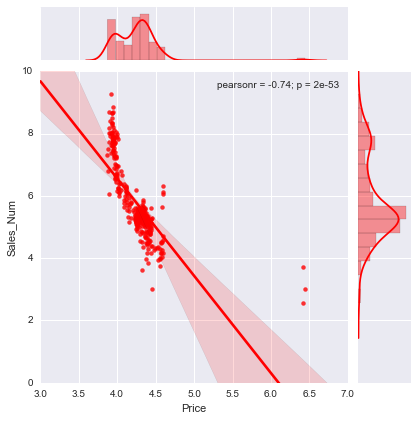

In [67]:
jointplt(u'Shampoo水润去屑750')

In [17]:
output1 = df[['uv','Sales_Num','Preferential_Price','SuperID']].groupby('SuperID').sum()

In [18]:
output1.head()

,uv,Sales_Num,Preferential_Price
SuperID,,,
Buddle修护水养SH500*2+CN400,3134657,176433,21327563.21
Buddle修护水养SH500+CN500,1511282,70396,6205112.85
Buddle修护水养SH750+CN400,1985188,113077,11481023.79
Buddle修护水养SH750+CN400+Treatment150,94305,2028,225432.10
Buddle修护水养SH750+CN750,16218,70,10749.40


In [19]:
output2 = df[['ProductName','SuperID','Category','cost']].groupby('SuperID').first()

In [20]:
output2.head()

,ProductName,Category,cost
SuperID,,,
Buddle修护水养SH500*2+CN400,【京东超市】沙宣 VS 修护水养500ml洗发水*2+润发乳400ml送洗发露50ml*3+...,bundle,127.57
Buddle修护水养SH500+CN500,【京东超市】沙宣修护水养洗发水500ml+护发素500ml 送（洗发露50ml赠品+润发乳5...,bundle,87.70
Buddle修护水养SH750+CN400,【京东超市】沙宣洗护套装修护水养（洗发水750ml+护发素400ml）送洗发水50ml*2+...,bundle,103.83
Buddle修护水养SH750+CN400+Treatment150,沙宣洗护套装修护水养（洗发水750ml+护发素400ml+发膜150ml）（护发 发膜免蒸 ...,bundle,134.88
Buddle修护水养SH750+CN750,沙宣洗护套装修护水养（洗发露750ml+护发素750ml）（头发护理 改善毛躁 深层清洁 补...,shampoo,136.67


In [21]:
output = output1.join(output2,how = 'inner')

In [22]:
output.head()

,uv,Sales_Num,Preferential_Price,ProductName,Category,cost
SuperID,,,,,,
Buddle修护水养SH500*2+CN400,3134657,176433,21327563.21,【京东超市】沙宣 VS 修护水养500ml洗发水*2+润发乳400ml送洗发露50ml*3+...,bundle,127.57
Buddle修护水养SH500+CN500,1511282,70396,6205112.85,【京东超市】沙宣修护水养洗发水500ml+护发素500ml 送（洗发露50ml赠品+润发乳5...,bundle,87.70
Buddle修护水养SH750+CN400,1985188,113077,11481023.79,【京东超市】沙宣洗护套装修护水养（洗发水750ml+护发素400ml）送洗发水50ml*2+...,bundle,103.83
Buddle修护水养SH750+CN400+Treatment150,94305,2028,225432.10,沙宣洗护套装修护水养（洗发水750ml+护发素400ml+发膜150ml）（护发 发膜免蒸 ...,bundle,134.88
Buddle修护水养SH750+CN750,16218,70,10749.40,沙宣洗护套装修护水养（洗发露750ml+护发素750ml）（头发护理 改善毛躁 深层清洁 补...,shampoo,136.67


In [68]:
elastics = []
for key in output.index:
    elastics.append((statsReg(key)))
output['priceElasticity'] = elastics

In [69]:
output.rename(columns={'Preferential_Price': 'offtake','Sales_Num': 'salesNum','ProductName': 'productName','Category':'category'}, inplace=True)

In [72]:
output.head()

,uv,salesNum,offtake,productName,category,cost,priceElasticity,frontMargin,marginPercent,vol
SuperID,,,,,,,,,,
Buddle修护水养SH500*2+CN400,3134657,176433,21327563.21,【京东超市】沙宣 VS 修护水养500ml洗发水*2+润发乳400ml送洗发露50ml*3+...,bundle,127.57,-6.940412,-1179994.60,-5.532721,1700
Shampoo水润去屑750,1511312,242356,13696078.40,【京东超市】沙宣去屑洗发水水润去屑型750ml（男女通用 洗头膏 洗发露 新老包装随机发货）,shampoo,74.20,-2.206437,-4286736.80,-31.299009,750
Shampoo修护水养750,2452229,190663,12049947.13,沙宣洗发水修护水养750ml（男女通用 洗头膏 洗发露 头发护理）,shampoo,74.20,-1.689215,-2097247.47,-17.404620,750
Buddle修护水养SH750+CN400,1985188,113077,11481023.79,【京东超市】沙宣洗护套装修护水养（洗发水750ml+护发素400ml）送洗发水50ml*2+...,bundle,103.83,-7.724258,-259761.12,-2.262526,1450
Shampoo清盈顺柔750,1101352,177420,9830321.04,【京东超市】沙宣洗发水清盈顺柔750ml（洗发露 新老包装随机发货）,shampoo,74.20,-2.055849,-3334242.96,-33.917946,750


In [73]:
output['frontMargin'] = output['offtake'] - output['cost'] * output['salesNum']

In [74]:
output['marginPercent'] = output.frontMargin/output.offtake * 100

In [75]:
output.head()

,uv,salesNum,offtake,productName,category,cost,priceElasticity,frontMargin,marginPercent,vol
SuperID,,,,,,,,,,
Buddle修护水养SH500*2+CN400,3134657,176433,21327563.21,【京东超市】沙宣 VS 修护水养500ml洗发水*2+润发乳400ml送洗发露50ml*3+...,bundle,127.57,-6.940412,-1179994.60,-5.532721,1700
Shampoo水润去屑750,1511312,242356,13696078.40,【京东超市】沙宣去屑洗发水水润去屑型750ml（男女通用 洗头膏 洗发露 新老包装随机发货）,shampoo,74.20,-2.206437,-4286736.80,-31.299009,750
Shampoo修护水养750,2452229,190663,12049947.13,沙宣洗发水修护水养750ml（男女通用 洗头膏 洗发露 头发护理）,shampoo,74.20,-1.689215,-2097247.47,-17.404620,750
Buddle修护水养SH750+CN400,1985188,113077,11481023.79,【京东超市】沙宣洗护套装修护水养（洗发水750ml+护发素400ml）送洗发水50ml*2+...,bundle,103.83,-7.724258,-259761.12,-2.262526,1450
Shampoo清盈顺柔750,1101352,177420,9830321.04,【京东超市】沙宣洗发水清盈顺柔750ml（洗发露 新老包装随机发货）,shampoo,74.20,-2.055849,-3334242.96,-33.917946,750


In [76]:
def volCalc(row):
    name = row['productName']
    try:
        vol = 0
        p = re.compile(r'(\d+)ml')
        sizes = p.findall(name)
        for size in sizes:
            #print size
            p1 = re.compile(size + r'ml\D+(\d)\D+')
            amount = p1.findall(name)
            if amount:
                vol += int(size)*int(amount[0])
            else:
                vol += int(size)*1
        return vol
    
    except:
        return np.nan

In [77]:
output['vol'] = output.apply(volCalc,axis = 1)

In [78]:
output.head()

,uv,salesNum,offtake,productName,category,cost,priceElasticity,frontMargin,marginPercent,vol
SuperID,,,,,,,,,,
Buddle修护水养SH500*2+CN400,3134657,176433,21327563.21,【京东超市】沙宣 VS 修护水养500ml洗发水*2+润发乳400ml送洗发露50ml*3+...,bundle,127.57,-6.940412,-1179994.60,-5.532721,1700
Shampoo水润去屑750,1511312,242356,13696078.40,【京东超市】沙宣去屑洗发水水润去屑型750ml（男女通用 洗头膏 洗发露 新老包装随机发货）,shampoo,74.20,-2.206437,-4286736.80,-31.299009,750
Shampoo修护水养750,2452229,190663,12049947.13,沙宣洗发水修护水养750ml（男女通用 洗头膏 洗发露 头发护理）,shampoo,74.20,-1.689215,-2097247.47,-17.404620,750
Buddle修护水养SH750+CN400,1985188,113077,11481023.79,【京东超市】沙宣洗护套装修护水养（洗发水750ml+护发素400ml）送洗发水50ml*2+...,bundle,103.83,-7.724258,-259761.12,-2.262526,1450
Shampoo清盈顺柔750,1101352,177420,9830321.04,【京东超市】沙宣洗发水清盈顺柔750ml（洗发露 新老包装随机发货）,shampoo,74.20,-2.055849,-3334242.96,-33.917946,750


In [79]:
# output.to_csv('output.csv', encoding='utf-8')

In [80]:
output = output.sort('offtake',ascending =False)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



In [81]:
output.head()

,uv,salesNum,offtake,productName,category,cost,priceElasticity,frontMargin,marginPercent,vol
SuperID,,,,,,,,,,
Buddle修护水养SH500*2+CN400,3134657,176433,21327563.21,【京东超市】沙宣 VS 修护水养500ml洗发水*2+润发乳400ml送洗发露50ml*3+...,bundle,127.57,-6.940412,-1179994.60,-5.532721,1700
Shampoo水润去屑750,1511312,242356,13696078.40,【京东超市】沙宣去屑洗发水水润去屑型750ml（男女通用 洗头膏 洗发露 新老包装随机发货）,shampoo,74.20,-2.206437,-4286736.80,-31.299009,750
Shampoo修护水养750,2452229,190663,12049947.13,沙宣洗发水修护水养750ml（男女通用 洗头膏 洗发露 头发护理）,shampoo,74.20,-1.689215,-2097247.47,-17.404620,750
Buddle修护水养SH750+CN400,1985188,113077,11481023.79,【京东超市】沙宣洗护套装修护水养（洗发水750ml+护发素400ml）送洗发水50ml*2+...,bundle,103.83,-7.724258,-259761.12,-2.262526,1450
Shampoo清盈顺柔750,1101352,177420,9830321.04,【京东超市】沙宣洗发水清盈顺柔750ml（洗发露 新老包装随机发货）,shampoo,74.20,-2.055849,-3334242.96,-33.917946,750


In [83]:
totalOfftake = output['offtake'].sum()
totalMargin = output['frontMargin'].sum()
totalMarginPercent = totalMargin/totalOfftake
print totalMarginPercent

-0.11065116744


In [87]:
def priceInflation(percent):
    # Filter Q2 SKUs
    Q2Mask = (output.uv > 1000000) & (output.priceElasticity < 4) & (output.marginPercent < -11)
    Q2 = output[Q2Mask].copy()
    originalMargin = Q2.frontMargin.sum()
    originalOfftake = Q2.offtake.sum()
    #offtake estimation after price increase: margin% increase, vol offtake decrease
    Q2['newOfftake'] = Q2.offtake*(1 + percent/100.0)*(1 + (percent/100.0)*Q2.priceElasticity)
    Q2Shrink =  float(Q2.newOfftake.sum())/originalOfftake
    offtakeDiff = Q2.newOfftake.sum() - originalOfftake
    #margin = offtake - cost
    Q2['newMargin'] = Q2.newOfftake - Q2.salesNum*(1 + (percent/100.0)*Q2.priceElasticity)*Q2.cost
    marginDiff = Q2.newMargin.sum() - originalMargin
    newTotalOfftake = totalOfftake + offtakeDiff
    newTotalMargin = totalMargin + marginDiff
    newTotalMarginPercent = float(newTotalMargin)/newTotalOfftake
    newOfftakePercent = float(newTotalOfftake)/totalOfftake
    return newOfftakePercent*100, newTotalMarginPercent*100,Q2Shrink*100

In [88]:
offtakes = []
margins = []
Q2Srink = []
for i in range(0,31):
    offtakes.append(priceInflation(i)[0])
    margins.append(priceInflation(i)[1])
    Q2Srink.append(priceInflation(i)[2])

In [89]:
linspace_x = np.linspace(0, 30, 31)
y0 = offtakes
y1 = margins
y2 = Q2Srink

# Create traces
trace0 = go.Scatter(
    x = linspace_x,
    y = y0,
    mode = 'lines+markers',
    name = 'Total Offtake Idx'
)
trace1 = go.Scatter(
    x = linspace_x,
    y = y1,
    mode = 'lines+markers',
    name = 'Total Front Margin'
)
trace2 = go.Scatter(
    x = linspace_x,
    y = y2,
    mode = 'lines+markers',
    name = 'Q2 Offtake'
)

layout = go.Layout(
    title='Estimated Impact of Q2 Price Increase',
    xaxis=dict(
        title='Price Increase Idx on Quandrant 2',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='idx',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)
data = [trace0, trace1,trace2]

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='styling-names')

In [40]:
# Drive extra traffic for Q3
def trafficDirve(percent):
    Q3Mask = (output.uv < 1000000) & (output.priceElasticity < 4) & (output.marginPercent > 0) & (output.vol == 400)
    Q3 = output[Q3Mask].copy()
    originalMargin = Q3.frontMargin.sum()
    originalOfftake = Q3.offtake.sum()
    #print originalOfftake
    Q3['newOfftake'] = Q3.offtake*(1 + percent/100.0)
    #print Q3.newOfftake.sum()
    offtakeDiff = Q3.newOfftake.sum() - originalOfftake
    #print offtakeDiff
    Q3['newMargin'] = Q3.newOfftake - Q3.salesNum*(1 + percent/100.0)*Q3.cost
    marginDiff = Q3.newMargin.sum() - originalMargin
    newTotalOfftake = totalOfftake + offtakeDiff
    newTotalMargin = totalMargin + marginDiff
    newTotalMarginPercent = newTotalMargin/newTotalOfftake
    newOfftakePercent = newTotalOfftake/totalOfftake
    return newOfftakePercent*100, newTotalMarginPercent*100

In [41]:
# shift percent% of Q2 traffic to Q3

def trafficShift(percent):
    #cut percent%  uv of Q2
    Q2Mask = (output.uv > 1000000) & (output.priceElasticity < 4) & (output.marginPercent < -11)
    Q2 = output[Q2Mask].copy()
    uvShifted = Q2.uv.sum()*percent/100.0
    deltaOfftakeQ2 = Q2.offtake.sum()*(1-percent/100.0) - Q2.offtake.sum()
    deltaMarginQ2 = Q2.frontMargin.sum()*(1-percent/100.0) - Q2.frontMargin.sum()
    #Shift those uv to selected SKU in Q3  
    Q3Mask = (output.uv < 1000000) & (output.priceElasticity < 4) & (output.marginPercent > 10) & (output.vol >= 400)
    Q3 = output[Q3Mask].copy()
    originalMargin = Q3.frontMargin.sum()
    originalOfftake = Q3.offtake.sum()
    #those uv means how many percent extra for Q3?
    percentShifted = float(uvShifted)/Q3.uv.sum()*100   
    #Assume keep the conversion rate, how much will change?
    #improve conversion rate 1.5X
    deltaOfftakeQ3 = Q3.offtake.sum()*percentShifted/100.0*1.5
    deltaMarginQ3 = Q3.frontMargin.sum()*percentShifted/100.0*1.5
    #Q2 decrease, Q3 increase, so how much in total?
    newTotalOfftake = totalOfftake + deltaOfftakeQ2 + deltaOfftakeQ3
    
    newTotalOfftake = newTotalOfftake
    newTotalMargin = totalMargin + deltaMarginQ2 + deltaMarginQ3
                                                                                 
    newTotalMarginPercent = float(newTotalMargin)/newTotalOfftake
    newOfftakePercent = float(newTotalOfftake)/totalOfftake
    
    return newOfftakePercent*100, newTotalMarginPercent*100

In [42]:
trafficShift(20)

(97.57729213972097, -8.686674325138636)

In [43]:
offtakes = []
margins = []
for i in range(0,50):
    offtakes.append(trafficShift(i)[0])
    margins.append(trafficShift(i)[1])

In [44]:
linspace_x = np.linspace(0, 50, 51)
y0 = offtakes
y1 = margins

# Create traces
trace0 = go.Scatter(
    x = linspace_x,
    y = y0,
    mode = 'lines+markers',
    name = 'Offtake Percent'
)
trace1 = go.Scatter(
    x = linspace_x,
    y = y1,
    mode = 'lines+markers',
    name = 'Front Margin Percent'
)

layout = go.Layout(
    title='Estimated Impact of Shifting Q2 Traffic on Total Offtake & Margin',
    xaxis=dict(
        title='Traffic Shift Idx',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='idx',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)
data = [trace0, trace1]

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='styling-names')

In [45]:
def adjust(priceInflationPercent,trafficShiftPercent):
    offtakeIdx = (priceInflation(priceInflationPercent)[0] + trafficShift(trafficShiftPercent)[0])/2
    marginIdx = (priceInflation(priceInflationPercent)[1] + trafficShift(trafficShiftPercent)[1])/2
    return offtakeIdx,marginIdx

In [46]:
# Offtake Diagram
w, h = 51, 31
Matrix = [[0 for x in range(w)] for y in range(h)] 

for i in range(0,31):
    for j in range (0,51):
        Matrix[i][j] = adjust(i,j)[0]

trace = go.Heatmap(z=Matrix)
data=[trace]

layout = go.Layout(
    title='Estimated Impact of the Adjustment on Total Offtake',
    xaxis=dict(
        title='Traffic Shift Idx',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price Inflation Idx',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='styling-names')

In [47]:
# Margin Diagram
w, h = 51, 31
Matrix1 = [[0 for x in range(w)] for y in range(h)] 

for i in range(0,31):
    for j in range (0,51):
        Matrix1[i][j] = adjust(i,j)[1]

trace = go.Heatmap(z=Matrix1)
data=[trace]

layout = go.Layout(
    title='Estimated Impact of the Adjustment on Total Front Margin',
    xaxis=dict(
        title='Traffic Shift Idx',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price Inflation Idx',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='styling-names')

In [48]:
list = [adjust(i,0)[0] for i in range (-50,50)]

In [49]:
linspace_x = np.linspace(-100, 100, 201)
y0 = [adjust(i,0)[0] for i in range (-100,100)]
y1 = [adjust(i,0)[1] for i in range (-100,100)]

# Create traces
trace0 = go.Scatter(
    x = linspace_x,
    y = y0,
    mode = 'lines+markers',
    name = 'Offtake Idx'
)


# trace1 = go.Scatter(
#     x = linspace_x,
#     y = y1,
#     mode = 'lines+markers',
#     name = 'Front Margin Idx'
# )

layout = go.Layout(
    title='Estimated Impact of Price Adjustment on Total Offtake',
    xaxis=dict(
        title='Price Adjustment',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='idx',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)
# data = [trace0,trace1]
data = [trace0]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='styling-names')

In [50]:
linspace_x = np.linspace(-20, 80, 100)

y1 = [adjust(i,0)[1] for i in range (-20,80)]

# Create traces
trace0 = go.Scatter(
    x = linspace_x,
    y = y1,
    mode = 'lines+markers',
    name = 'Front Margin Idx'
)


# trace1 = go.Scatter(
#     x = linspace_x,
#     y = y1,
#     mode = 'lines+markers',
#     name = 'Front Margin Idx'
# )

layout = go.Layout(
    title='Estimated Impact of Price Adjustment on Margin%',
    xaxis=dict(
        title='Price Adjustment',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='idx',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)
# data = [trace0,trace1]
data = [trace0]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='styling-names')